# "Proyección del Nivel del Mar para el año 2050: Análisis y Pronóstico mediante Regresión Lineal"

Se Analizará un conjunto de datos sobre el cambio del nivel medio del mar a nivel mundial desde 1880. Se Utilizará los datos para predecir el cambio del nivel del mar hasta el año 2050.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

You can download dataset here: 👇👇

https://github.com/WLozanoH/projects_freecodecamp/blob/main/projects/epa-sea-level.csv

* 1. We use Pandas to import the data from epa-sea-level.csv.

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


* CSIRO Adjusted Sea Level: Nivel del mar ajustado por CSIRO

* Lower Error Bound: Límite de error inferior

* Upper Error Bound: Límite de error superior

* NOAA Adjusted Sea Level: Nivel del mar ajustado por NOAA

* 2. we use matplotlib to create a scatter plot using the 'Year' column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.

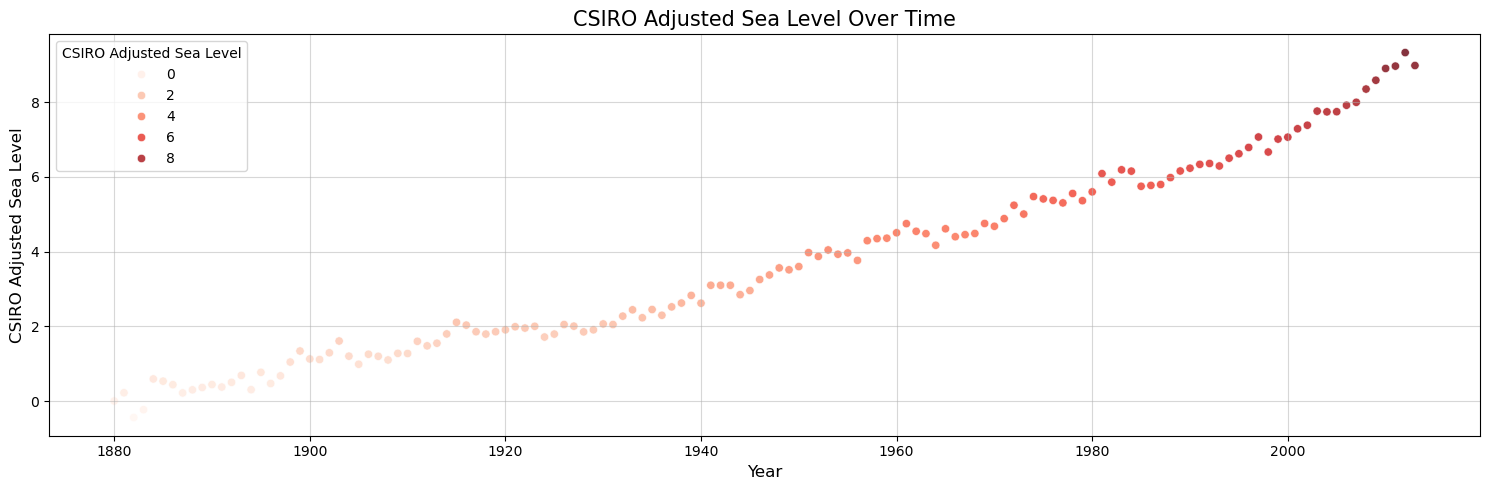

In [3]:
#crear el gráfico de dispersión
plt.figure(figsize= (15,5))
sns.scatterplot(x='Year', y='CSIRO Adjusted Sea Level', data= df, hue='CSIRO Adjusted Sea Level', palette='Reds', alpha = 0.8)

#Agregar títulos y etiquetas
plt.title('CSIRO Adjusted Sea Level Over Time', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('CSIRO Adjusted Sea Level', fontsize = 12)

#Mostrar gráfico
plt.grid(True, alpha = 0.5)
plt.tight_layout()
plt.show()

Observación:

La variable 'CSIRO Adjusted Sea Level' tiene una relación positiva con 'year', a medida que pasan los años, el nivel del mar aumenta, en 1880 nivel del mar cercano al valor cero y después del año 2000, el nivel del mar, superior al valor 8

* 3. We Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [4]:
import scipy   #scipy => biblioteca de análisis estadístico
from scipy import stats   #stats => Submodulo de biblioteca 'scipy',  >>> scipy.stats - estadística avanzada
from scipy.stats import linregress    #linregress => función de regresión lineal


* scipy: es la biblioteca principal.
* stats: es un submódulo de scipy que contiene herramientas estadísticas.
* linregress: es una función dentro de stats que realiza regresiones lineales.

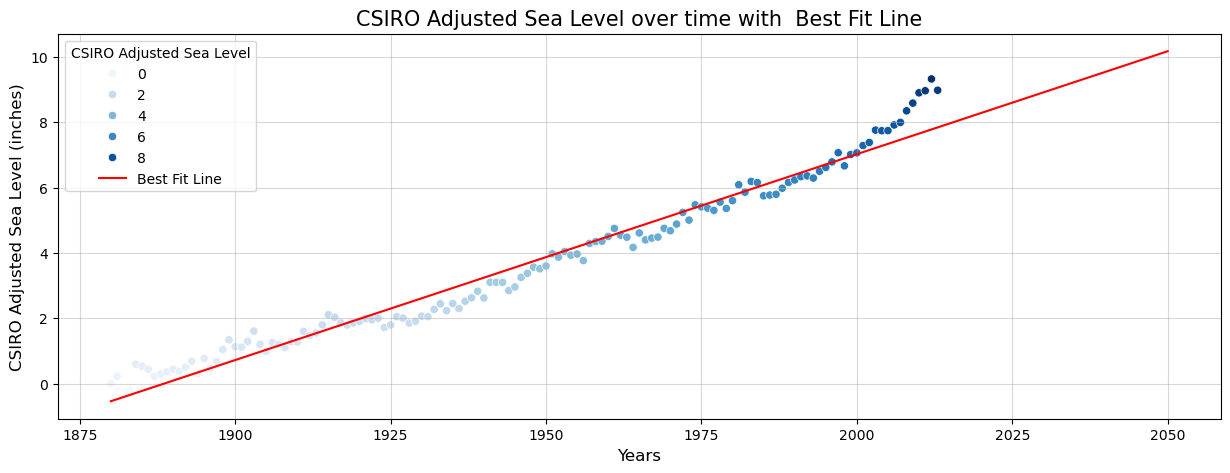

El nivel del mar para el año 2050 será:  10.18 pulgadas.


In [5]:
#creamos el gráfico de dispersión
plt.figure(figsize=(15,5))
sns.scatterplot(x='Year',y='CSIRO Adjusted Sea Level',data=df, hue='CSIRO Adjusted Sea Level', palette= 'Blues')

#calcular la línea de mejor ajuste
slope, intercept, r_value, p_value, std_error = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

#crear los valores del eje x para la línea de mejor ajuste hasta el año 2050
years_extended = np.arange(1880,2051)
sea_levels_predicted = intercept + slope * years_extended

#graficamos la línea de mejor ajuste 
plt.plot(years_extended, sea_levels_predicted, color = 'red', label = 'Best Fit Line')

#Agregar títulos y etiquetas
plt.title('CSIRO Adjusted Sea Level over time with  Best Fit Line', fontsize = 15)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('CSIRO Adjusted Sea Level (inches)', fontsize = 12)


#Mostrar leyenda y graficos
plt.legend(title = 'CSIRO Adjusted Sea Level')
plt.grid(True, alpha = 0.5)
plt.show()

#Predicción del nivel del mar para el año 2050
sea_level_2050 = intercept + slope * 2050

print(f'El nivel del mar para el año 2050 será: {sea_level_2050: .2f} pulgadas.')


* Puntos recomendables para un modelo de regresión lineal consistente:

    1. Comparación relativa: Un error estándar bajo en relación con la magnitud de la pendiente es un buen indicador. Por ejemplo, si la pendiente es 10 y el error estándar es 0.1, es un excelente ajuste. En cambio, si la pendiente es 10 y el error estándar es 5, entonces la pendiente no es tan confiable.

    2. Regla del 10% (aproximada): Si el error estándar es menor al 10% de la magnitud de la pendiente, suele considerarse un ajuste razonable. Esto indica que la pendiente estimada no varía mucho respecto a su valor esperado.

    3. Coeficiente de determinación (R²): Además del error estándar, es útil observar el valor de R² (que se relaciona con el coeficiente de correlación). Un R² cercano a 1 indica que el modelo explica bien la variabilidad en los datos.
    
    4. Prueba de significancia (p-value): Un valor 'p' bajo (típicamente menor a 0.05) para la pendiente también es una señal de que la regresión es significativa y que el error estándar no está afectando demasiado la estimación.


* 4. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

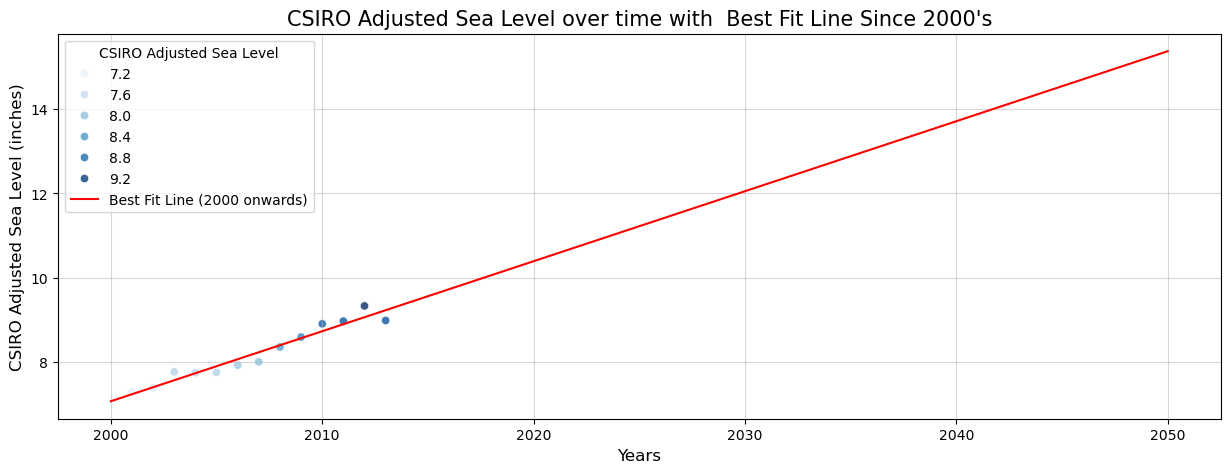

El nivel del mar para el año 2050 será:  15.38 pulgadas


In [6]:
#filtramos la data a partir del año 2000
df_2000 = df[df['Year'] >= 2000]

#creamos la figura de dispersión
plt.figure(figsize=(15,5))
sns.scatterplot(x='Year', y='CSIRO Adjusted Sea Level', data=df_2000, hue='CSIRO Adjusted Sea Level', palette='Blues', alpha = 0.8)

#Calcular la linea de mejor ajuste
slope, intercept, r_value, p_value, std_error = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])

#creamos los valores del eje x para la línea de mejor ajuste
years_extended = np.arange(2000,2051)
sea_levels_predicted = intercept + slope * years_extended

#graficamos la línea de mejor ajuste
plt.plot(years_extended, sea_levels_predicted, color = 'red', label = 'Best Fit Line (2000 onwards)')

#Agregamos titulos y etiquetas
plt.title("CSIRO Adjusted Sea Level over time with  Best Fit Line Since 2000's", fontsize = 15)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('CSIRO Adjusted Sea Level (inches)', fontsize = 12)

#mostrar leyenda y gráfico
plt.legend(title ='CSIRO Adjusted Sea Level')
plt.grid(True, alpha = 0.5)
plt.show()

#Predicción del nivel del mar en el año 2050 : tomando sólo datos del año 2000 en adelante
sea_level_2050 = intercept + slope * 2050

print(f'El nivel del mar para el año 2050 será: {sea_level_2050: .2f} pulgadas')

5. The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

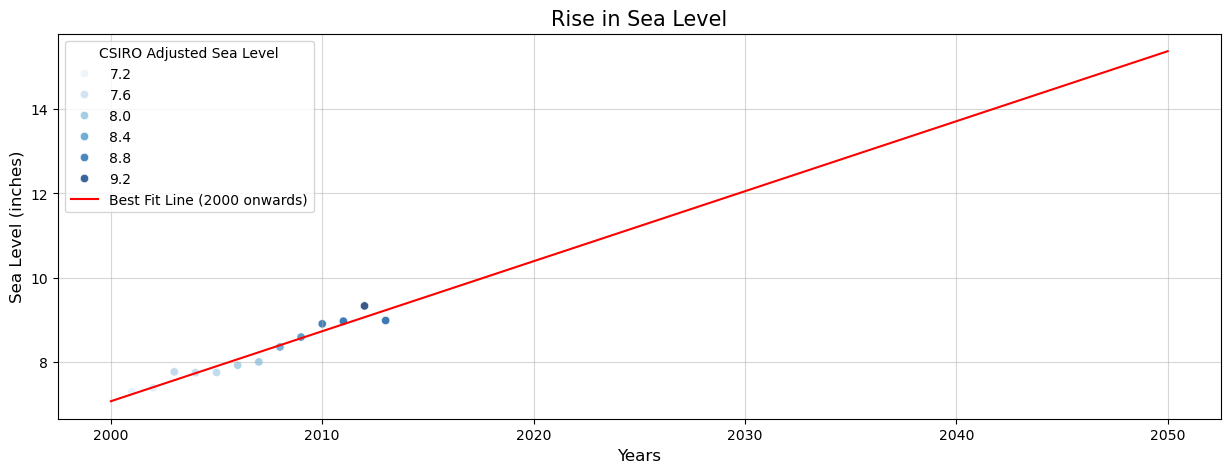

El nivel del mar para el año 2050 será:  15.38 pulgadas


In [7]:
#filtramos la data a partir del año 2000
df_2000 = df[df['Year'] >= 2000]

#creamos la figura de dispersión
plt.figure(figsize=(15,5))
sns.scatterplot(x='Year', y='CSIRO Adjusted Sea Level', data=df_2000, hue='CSIRO Adjusted Sea Level', palette='Blues', alpha = 0.8)

#Calcular la linea de mejor ajuste
slope, intercept, r_value, p_value, std_error = linregress(df_2000['Year'], df_2000['CSIRO Adjusted Sea Level'])

#creamos los valores del eje x para la línea de mejor ajuste
years_extended = np.arange(2000,2051)
sea_levels_predicted = intercept + slope * years_extended

#graficamos la línea de mejor ajuste
plt.plot(years_extended, sea_levels_predicted, color = 'red', label = 'Best Fit Line (2000 onwards)')

#Agregamos titulos y etiquetas
plt.title("Rise in Sea Level", fontsize = 15)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Sea Level (inches)', fontsize = 12)

#mostrar leyenda y gráfico
plt.legend(title ='CSIRO Adjusted Sea Level')
plt.grid(True, alpha = 0.5)
plt.show()

#Predicción del nivel del mar en el año 2050 : tomando sólo datos del año 2000 en adelante
sea_level_2050 = intercept + slope * 2050

print(f'El nivel del mar para el año 2050 será: {sea_level_2050: .2f} pulgadas')

* Conclusiones:

1. *Incremento del nivel del mar a largo plazo (1880-2050):*

    Utilizando datos desde 1880, la regresión lineal proyecta que el nivel del mar aumentará aproximadamente 10.18 pulgadas para el año 2050. Esto sugiere una tendencia de aumento constante y significativa en el nivel del mar.

2. *Aceleración reciente en la tasa de aumento (2000-2050):*

    Al analizar los datos desde el año 2000, se observa un aumento más acelerado, con una predicción de que el nivel del mar alcanzará 15.38 pulgadas para el año 2050. Este incremento refleja un cambio en la dinámica de los últimos años, posiblemente relacionado con un mayor impacto del cambio climático.

3. *Confianza en el modelo:*

    El bajo error estándar y el alto valor de R² indican que el modelo de regresión lineal explica bien la variabilidad en los datos y es una herramienta confiable para hacer predicciones a futuro.

4. *Variación en las proyecciones según el rango de datos:*

    Las predicciones varían significativamente dependiendo del período de tiempo analizado. Este cambio resalta la importancia de considerar el rango de datos adecuado al modelar fenómenos climáticos de largo plazo.

5. *Implicaciones para la planificación y adaptación:*

    Las predicciones sugieren un aumento continuo y acelerado en el nivel del mar, lo que subraya la necesidad de implementar medidas de adaptación a nivel global, especialmente en áreas costeras vulnerables a la subida del nivel del mar.
